In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#python lists are heterogeneous
L3 = [True, "2", 3.0, 4]
print([type(item) for item in L3])

#python arrays little better - provides more efficient storage but not efficient operations on them
import array
L = list(range(10))
A = array.array('i', L); print(A)

#numpy arrays provide efficient array based storage as well as efficient operations - ufuncs, etc.
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

#BAD---->>>>>using list.append
import time
start = time.time()
for _ in range(10):
    my_list2=[]
    for e in my_list:
        my_list2.append(e*2)
elapsed_time = (time.time() - start)
#my_list2
print("t1 ",str(elapsed_time))


#BETTER----->>>>>>using list comprehension
import time
start = time.time()
for _ in range(10): my_list2 = [x * 2 for x in my_list]
elapsed_time = (time.time() - start)
#my_list2
print("t2 ",str(elapsed_time))

#BEST--------->>>>>>>>>>>>>>using numpy array
import time
start = time.time()
for _ in range(10): my_arr2 = my_arr * 2
elapsed_time = (time.time() - start)
#my_arr2
print("t3 ",str(elapsed_time))


[<class 'bool'>, <class 'str'>, <class 'float'>, <class 'int'>]
array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
t1  2.851055145263672
t2  1.1873438358306885
t3  0.030427932739257812


In [3]:
all_points4 = np.random.random((1600,2))*20
cg = np.array([10,10]).reshape(1,2)
distances = np.sqrt(np.sum(np.power(all_points4-cg,2),axis=1))

on_circle = all_points4[(np.sqrt(np.sum(np.power(all_points4-cg,2),axis=1)) >= 7) & (np.sqrt(np.sum(np.power(all_points4-cg,2),axis=1)) <= 8)]
out_circle = all_points4[~(np.sqrt(np.sum(np.power(all_points4-cg,2),axis=1)) >= 7) | ~(np.sqrt(np.sum(np.power(all_points4-cg,2),axis=1)) <= 8)]

(0.0, 20.0)

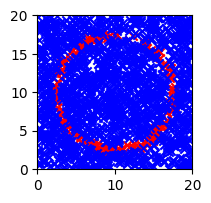

In [4]:
plt.figure(figsize=(2,2))
plt.scatter(on_circle[:,0],on_circle[:,1],marker='x',color = 'red')
plt.scatter(out_circle[:,0],out_circle[:,1],marker='x',color = 'blue')

plt.xlim(0,20)
plt.ylim(0,20)

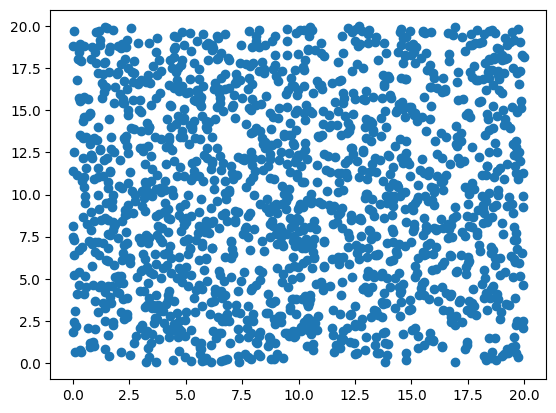

In [8]:
plt.scatter(all_points4[:,0],all_points4[:,1])

In [5]:
#initial_centers = centers = np.random.rand(4,2)*20;
all_cluster_centers = []
all_deltas = []
initial_centers = np.array([[9,9], [9,10],[10,10], [10,12]]) # works best
#initial_centers = np.array([[1,2], [1,3],[1,4], [1,5]])  # gives runtime warnings due to instability of the algorithm

all_cluster_centers.append(initial_centers.copy())
print('Initial centers:\n', initial_centers, '\n')
def cluster_algo(dataset, starting_centers):
    #distances = np.zeros((4,dataset.shape[0]))
    new_centers = starting_centers
    deltas = np.ones((4,2))*100000
    j= 0
    while abs(np.sum(deltas)) > 1:
        print('iteration: ',j)
        j += 1
        temp_old_centers = new_centers.copy()
        c2 = temp_old_centers[:,np.newaxis,:]
        distances = np.sqrt(np.sum(np.power(dataset-c2,2),axis=2))
        
        #for i in range(4):
        #    distances[i] = np.sqrt(np.sum(np.power(dataset-new_centers[i],2),axis=1))
        
        center_assigned = np.argmin(distances,axis=0)

        for i in range(4):
            #print('shape: ',dataset[center_assigned==i].shape)
            if dataset[center_assigned==i].shape[0] != 0:
                new_centers[i] = np.mean(dataset[center_assigned==i],axis=0)
            else:
                print('Empty slice case')
                new_centers[i] = new_centers[i] + 5
            
        #print('New centers:\n', new_centers, '\n')
        if np.any(temp_old_centers == 0):
            print('zero division possible')
            print(temp_old_centers)
            deltas = np.abs((new_centers - temp_old_centers)/(temp_old_centers+0.5)) *100
        else:
            deltas = np.abs((new_centers - temp_old_centers)/(temp_old_centers)) *100
        #print('Deltas:\n', deltas, '\n')
        #print('Total deltas: ',np.sum(deltas))
        all_cluster_centers.append(new_centers.copy())
        all_deltas.append(np.sum(deltas))
    return new_centers, np.sum(deltas)

nc,d = cluster_algo(all_points4,initial_centers)
print('Final cluster centers:\n', nc)
print('Final delta: ', d)
#print('All cluster centers:\n',all_cluster_centers)

Initial centers:
 [[ 9  9]
 [ 9 10]
 [10 10]
 [10 12]] 

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
Final cluster centers:
 [[ 4  3]
 [ 3 13]
 [14  5]
 [13 15]]
Final delta:  0.0


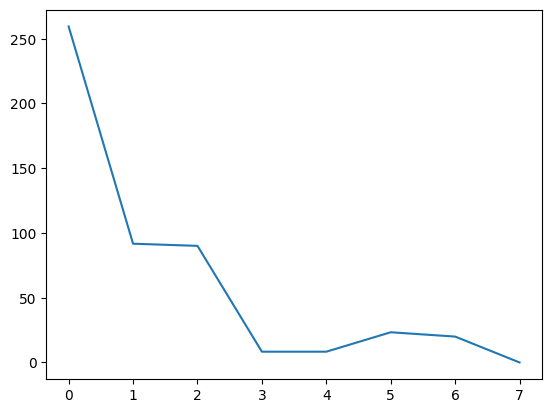

In [6]:
plt.plot(range(len(all_deltas)),all_deltas)

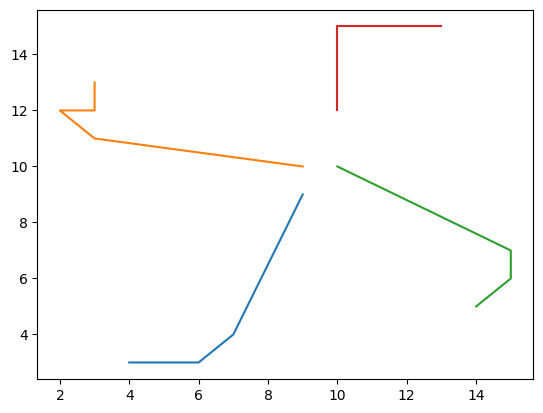

In [7]:
all_cluster_centers = np.array(all_cluster_centers)
plt.plot(all_cluster_centers[:,0,:][:,0],all_cluster_centers[:,0,:][:,1])
plt.plot(all_cluster_centers[:,1,:][:,0],all_cluster_centers[:,1,:][:,1])
plt.plot(all_cluster_centers[:,2,:][:,0],all_cluster_centers[:,2,:][:,1])
plt.plot(all_cluster_centers[:,3,:][:,0],all_cluster_centers[:,3,:][:,1])

In [9]:
######LINEAR ALGEBRA#########
#transpose of array / matrix
arr16 = np.arange(15).reshape(3,5); arr16
arr16.T

x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x.dot(y)
np.dot(x,y)
np.dot(y,x)
np.ones(3)
np.dot(x,np.ones(3))

from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
print(X)
mat = X.T.dot(X); print(mat)
print(inv(mat))
print(np.absolute(np.round(mat.dot(inv(mat)))))

[[-0.49161884  0.99044267  0.34849363  0.12001462 -0.32332722]
 [ 0.74741498 -1.05486469 -0.34567373  0.90127226  1.30262508]
 [ 0.20226086  0.68402047  0.55741635 -1.86336241  0.01640875]
 [ 1.22578321 -1.33392293  1.45333807 -0.18942699  0.46194924]
 [ 0.63915434 -0.04058483 -1.75337661  1.6928665   1.99552921]]
[[ 2.75229044 -2.79803167  0.34385489  1.08754421  2.97757489]
 [-2.79803167  4.3425977  -0.77639433 -1.92245442 -2.38029925]
 [ 0.34385489 -0.77639433  5.73817221 -4.55192444 -3.38136006]
 [ 1.08754421 -1.92245442 -4.55192444  7.20049421  4.39529931]
 [ 2.97757489 -2.38029925 -3.38136006  4.39529931  5.99717577]]
[[ 19.06846783   5.88791887  -5.33327435   2.72975252 -12.13814386]
 [  5.88791887   2.43819904  -1.14833059   1.13039212  -3.43151638]
 [ -5.33327435  -1.14833059   2.25584231  -0.34294955   3.71542125]
 [  2.72975252   1.13039212  -0.34294955   0.87410312  -1.74064463]
 [-12.13814386  -3.43151638   3.71542125  -1.74064463   8.20186525]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0

In [10]:
from numpy.linalg import inv
def f1(mat):
    if mat.ndim != 2:
        raise Exception('you need to provide a 2D matrix')
    if mat.shape[0]==mat.shape[1]:
        if np.sum( (np.absolute(np.round(np.dot(mat,inv(mat)))) != 
                    np.eye(mat.shape[0])).reshape(mat.shape[0]*mat.shape[1]))==0:
            return True
    return False     

In [11]:
from numpy.linalg import inv, LinAlgError
def f2(mat):
    try:
        if np.sum( (np.absolute(np.round(np.dot(mat,inv(mat)))) != 
                    np.eye(mat.shape[0])).reshape(mat.shape[0]*mat.shape[1]))==0:
            return True
    except LinAlgError:
        print('you need to provide a 2D square matrix')

In [12]:
mat1 = np.random.randint(1,10,25).reshape(5,5); mat1

array([[3, 1, 6, 3, 1],
       [1, 9, 1, 9, 9],
       [7, 1, 1, 4, 4],
       [3, 5, 8, 6, 1],
       [8, 9, 1, 4, 9]])

In [13]:
f1(mat1)

True

In [16]:
#f1(np.random.randint(1,10,25))  # will give an error
f2(np.random.randint(1,10,25))

you need to provide a 2D square matrix


In [17]:
f2(np.random.randint(1,10,12).reshape(4,3))

you need to provide a 2D square matrix
